Define configuration to your working directory json file

In [100]:
config_path='C:\\Users\\hp user\\Documents\\sensor_output.json'

Inport required libraries

In [101]:
import sys
import json
import time
import random
import paho.mqtt.client as mqtt

Publish and subscribe sensor data using mqtt (details of sensors in json file)

In [111]:
with open(config_path,'r') as p:
            config = json.load(p)
            mqtt_config = config.get("mqtt", {})
            misc_config = config.get("misc", {})
            sensors = config.get("sensors")
            interval_ms = misc_config.get("interval_ms", 500)
            verbose = misc_config.get("verbose", False)
            host = mqtt_config.get("host", "mqtt.eclipse.org")
            port = mqtt_config.get("port", 1883)
            username = mqtt_config.get("username")
            password = mqtt_config.get("password")
            topic = mqtt_config.get("topic", "mqttgen")
            mqttc = mqtt.Client()
            mqttc.connect("mqtt.eclipse.org", 1883)
            t=mqttc.subscribe([("topic1",2),("topic2",1),("topic3",0)])
            keys = list(sensors.keys())
            x=0
            start_time = time.time()
            Temp=[]
            tt=[]
            Humidity=[]
            ht=[]
            Pressure=[]
            pt=[]
            while (x<100):
                x=time.time()-start_time
                sensor_id = random.choice(keys)
                sensor = sensors[sensor_id]
                min_val, max_val = sensor.get("range", [0, 100])
                val = random.randint(min_val, max_val)
                data = {
                    "id": sensor_id,
                    "value": val
                }
                for key in ["lat", "lng", "unit", "type", "description"]:
                    value = sensor.get(key)
                    if value is not None:
                        data[key] = value
                if (value=='Temperature'):
                       Temp.append(data['value'])
                       tt.append(x)
                elif (value=='Humidity'):
                       Humidity.append(data['value'])
                       ht.append(x)
                elif (value=='Pressure'):
                       Pressure.append(data['value'])    
                       pt.append(x)
                payload = json.dumps(data)
                if verbose:
                    print("%s: %s" % (topic, payload))
                mqttc.publish(topic, payload)
                time.sleep(interval_secs)
                print('\nsubcriber received message------------------------------------------------------------%')
                print(t)

sensors: {"id": "Sensor 2", "value": 45, "lat": 90, "lng": 90, "unit": "C", "type": "temperature", "description": "Temperature"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 2", "value": 23, "lat": 90, "lng": 90, "unit": "C", "type": "temperature", "description": "Temperature"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 3", "value": 28, "lat": 90, "lng": 10, "unit": "grams per cubic meter of moisture", "type": "Humidity", "description": "Humidity"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 2", "value": 21, "lat": 90, "lng": 90, "unit": "C", "type": "temperature", "description": "Temperature"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 3", "value": 4, "lat": 90, "lng": 10, "unit": "gra


subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 3", "value": 32, "lat": 90, "lng": 10, "unit": "grams per cubic meter of moisture", "type": "Humidity", "description": "Humidity"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 1", "value": 4, "lat": 10, "lng": 10, "unit": "Pascals", "type": "Pressure", "description": "Pressure"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 1", "value": 20, "lat": 10, "lng": 10, "unit": "Pascals", "type": "Pressure", "description": "Pressure"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 2", "value": 12, "lat": 90, "lng": 90, "unit": "C", "type": "temperature", "description": "Temperature"}

subcriber received message------------------------------------------------


subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 1", "value": 10, "lat": 10, "lng": 10, "unit": "Pascals", "type": "Pressure", "description": "Pressure"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 1", "value": 19, "lat": 10, "lng": 10, "unit": "Pascals", "type": "Pressure", "description": "Pressure"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 2", "value": 22, "lat": 90, "lng": 90, "unit": "C", "type": "temperature", "description": "Temperature"}

subcriber received message------------------------------------------------------------%
(0, 1)
sensors: {"id": "Sensor 3", "value": 4, "lat": 90, "lng": 10, "unit": "grams per cubic meter of moisture", "type": "Humidity", "description": "Humidity"}

subcriber received message------------------------------------------------

Data collection is done using MQTT, we visualise the data

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline


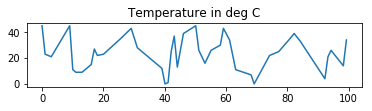

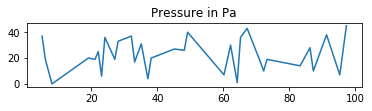

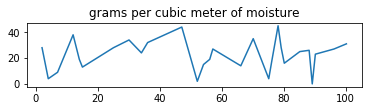

In [125]:
plt.subplot(3,1,1)
plt.plot(tt,Temp)
plt.title('Temperature in deg C')
plt.show()
plt.subplot(3,1,2)
plt.plot(pt,Pressure)
plt.title("Pressure in Pa")
plt.show()
plt.subplot(3,1,3)
plt.plot(ht,Humidity)
plt.title('grams per cubic meter of moisture')
plt.show()

Advice: Alarm can be rised since fron visualisation there are more fluctuations in temperature